<a href="https://colab.research.google.com/github/ivianrr/curso-big-data/blob/main/Sesi%C3%B3n%202/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Dependencias
import pandas as pd
import numpy as np
#Instalamos e importamos MySQL para Python
!pip install PyMySQL --quiet
import pymysql as pymsql
!pip install mysql-connector --quiet
import mysql.connector
from sqlalchemy import create_engine
!pip install sqlalchemy-utils --quiet
from sqlalchemy_utils import database_exists, create_database

     |████████████████████████████████| 43 kB 248 kB/s 
     |████████████████████████████████| 11.9 MB 5.2 MB/s 
     |████████████████████████████████| 100 kB 4.0 MB/s 


In [5]:
pokemon_file = "https://drive.google.com/uc?id=1Bkmz4aywoAaPXxjRL6PmpyWf8nVHb537&export=download"
pokemon = pd.read_csv(pokemon_file)
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [9]:
pokemon.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [34]:
pd.DataFrame(pokemon.groupby(["type1","type2"]).count().sort_values(by="name",ascending=False)["name"])

name
type1  type2       
normal flying    26
grass  poison    14
bug    flying    13
       poison    11
water  ground     9
...             ...
grass  ghost      1
ghost  fairy      1
       dragon     1
       dark       1
water  steel      1

[148 rows x 1 columns]

In [35]:
#Rellena la siguiente variable con tu nombre y apellido (Todo junto y sin espacios)
nombreBD = 'ivanreyes'
linkConexion = "" + nombreBD
#Establecemos la conexión
engine = create_engine(linkConexion)
if not database_exists(engine.url):
  create_database(engine.url)
pokemon.to_sql('pokemon',con=engine)

In [39]:
# Recupera los restaurantes "Virgil's Real Barbecue" de la tabla top150
query = """ SELECT  name, type1, type2 FROM pokemon WHERE type1="fire" ORDER BY base_happiness DESC"""
df  = pd.read_sql(query, con = engine )
df

,name,type1,type2
0,Heatran,fire,steel
1,Volcanion,fire,water
2,Charmander,fire,None
3,Charmeleon,fire,None
4,Charizard,fire,flying
5,Vulpix,fire,ice
6,Ninetales,fire,ice
7,Growlithe,fire,None
8,Arcanine,fire,None
9,Ponyta,fire,None


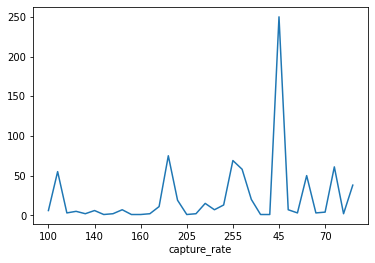

In [43]:
pokemon.groupby("capture_rate").count()["name"].plot()